In [203]:
import pandas as pd
import wget
from fire_data import *
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
import rasterio as rio
import os

In [14]:
scene_list = pd.read_csv("scene_list.csv")

In [15]:
scene_list

,productId,entityId,acquisitionDate,cloudCover,processingLevel,path,row,min_lat,min_lon,max_lat,max_lon,download_url
0,LC08_L1TP_149039_20170411_20170415_01_T1,LC81490392017101LGN00,2017-04-11 05:36:29.349932,0.00,L1TP,149,39,29.22165,72.41205,31.34742,74.84666,https://s3-us-west-2.amazonaws.com/landsat-pds...
1,LC08_L1TP_012001_20170411_20170415_01_T1,LC80120012017101LGN00,2017-04-11 15:14:40.001201,0.15,L1TP,12,1,79.51504,-22.06995,81.90314,-7.44339,https://s3-us-west-2.amazonaws.com/landsat-pds...
2,LC08_L1TP_012002_20170411_20170415_01_T1,LC80120022017101LGN00,2017-04-11 15:15:03.871058,0.38,L1TP,12,2,78.74882,-29.24387,81.14549,-15.04330,https://s3-us-west-2.amazonaws.com/landsat-pds...
3,LC08_L1TP_012010_20170411_20170415_01_T1,LC80120102017101LGN00,2017-04-11 15:18:14.918879,0.02,L1TP,12,10,69.67856,-56.04655,72.02949,-48.71678,https://s3-us-west-2.amazonaws.com/landsat-pds...
4,LC08_L1TP_012011_20170411_20170415_01_T1,LC80120112017101LGN00,2017-04-11 15:18:38.780265,10.65,L1TP,12,11,68.38187,-57.33186,70.76840,-51.13822,https://s3-us-west-2.amazonaws.com/landsat-pds...
5,LC08_L1TP_012019_20170411_20170415_01_T1,LC80120192017101LGN00,2017-04-11 15:21:49.747601,21.10,L1TP,12,19,57.55978,-66.08671,59.77420,-61.80908,https://s3-us-west-2.amazonaws.com/landsat-pds...
6,LC08_L1TP_012023_20170411_20170415_01_T1,LC80120232017101LGN00,2017-04-11 15:23:25.248212,0.02,L1TP,12,23,51.99026,-68.66168,54.18263,-65.24929,https://s3-us-west-2.amazonaws.com/landsat-pds...
7,LC08_L1TP_012026_20170411_20170415_01_T1,LC80120262017101LGN00,2017-04-11 15:24:36.887439,81.33,L1TP,12,26,47.77253,-70.39464,49.92658,-67.19278,https://s3-us-west-2.amazonaws.com/landsat-pds...
8,LC08_L1TP_012029_20170411_20170415_01_T1,LC80120292017101LGN00,2017-04-11 15:25:48.526665,43.39,L1TP,12,29,43.49926,-71.91725,45.65179,-68.88738,https://s3-us-west-2.amazonaws.com/landsat-pds...
9,LC08_L1TP_012030_20170411_20170415_01_T1,LC80120302017101LGN00,2017-04-11 15:26:12.404996,15.60,L1TP,12,30,42.06900,-72.38301,44.22652,-69.40886,https://s3-us-west-2.amazonaws.com/landsat-pds...


In [ ]:
temp2 = row.download_url[:-10]
temp2 = temp2 + row['productId'] + '_B4.TIF'

In [ ]:
if corr == temp2:
    print('yayyy')
else:
    print(corr)
    print(temp2)

In [ ]:
fist_row = scene_list.iloc[0]

In [ ]:
wget.download('https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/149/039/LC08_L1TP_149039_20170411_20170415_01_T1/LC08_L1TP_149039_20170411_20170415_01_T1_B4.TIF')

In [19]:
df = pd.DataFrame(scene_list)

In [22]:
date = '2017-04-11'
tar_lat = 30
tar_lon = 30

In [59]:
def get_url(target, date, tar_lat, tar_lon):
    target = target[(target['min_lat'] < tar_lat) & (target['max_lat'] > tar_lat) & (target['min_lon'] < tar_lon) & (target['max_lon'] > tar_lon)]
    if len(target.index) < 1:
        return None, None, None
    
    target = target.iloc[0]

    url = target.download_url[:-10]
    band3_raw = url + target['productId'] + '_B3.TIF'
    band4_raw = url + target['productId'] + '_B4.TIF'
    mtl = url + target['productId'] + '_MTL.txt'
    return band3_raw, band4_raw, mtl

In [25]:
data = load_fire_data(['data/DL_FIRE_M6_81124/fire_archive_M6_81124.csv', 'data/DL_FIRE_M6_81124/fire_nrt_M6_81124.csv'])

/Users/melodylui/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [26]:
fire_data = get_day_time_location(data)

In [128]:
fire_data

,acq_time,acq_date,latitude,longitude
0,2048,2004-02-09,57.2279,-121.9406
1,2048,2004-02-09,57.2252,-121.9467
2,1924,2004-02-16,54.0702,-117.1110
3,1924,2004-02-16,54.0882,-117.0558
4,1924,2004-02-16,54.0677,-117.0989
5,2018,2004-02-22,53.9773,-118.2702
6,2018,2004-02-22,53.9943,-118.3235
7,2018,2004-02-22,53.9911,-118.3331
8,2048,2004-02-25,57.5397,-121.9545
9,2203,2004-03-25,52.6380,-122.0221


In [39]:
with_dates = df[df['date'].isin(fire_data['acq_date'])]

In [60]:
url_df = []
target = df
for index, rows in fire_data.iterrows():
    band3_raw, band4_raw, mtl = get_url(target, rows[1], rows[2], rows[3])
    new_row = [band3_raw, band4_raw, mtl]
    url_df.append(new_row)

In [73]:
band3_raw, band4_raw, mtl = get_url(target, '2019-07-31', 59.3919, -104.7532)

In [66]:
url_dff = pd.DataFrame(url_df, columns = ['tf3', 'tf4', 'mtl'])

In [ ]:
temp_row = [band3_raw, band4_raw, mtl]
temp_df = pd.DataFrame(temp_row, columns = ['tf3', 'tf4', 'mtl'])

In [74]:
wget.download(band3_raw, '/Users/melodylui/Projects/NASA-CSA-Hackathon/downloaded_images')

KeyboardInterrupt: 

In [ ]:
for index, rows in temp_row.iterrows():
    wget.download(row[0], '/Users/melodylui/Projects/NASA-CSA-Hackathon/downloaded_images')
    wget.download(row[1], '/Users/melodylui/Projects/NASA-CSA-Hackathon/downloaded_images')
    wget.download(row[2], '/Users/melodylui/Projects/NASA-CSA-Hackathon/downloaded_images')

In [68]:
!pwd

/Users/melodylui/Projects/NASA-CSA-Hackathon


In [185]:
wget -P /Projects/spot-the-fire/downloaded_images url

SyntaxError: invalid syntax (<ipython-input-185-4dcf28a8c8df>, line 1)

In [124]:
!sentinelsat -u melodylui -p 7417417474741 -g search_polygon.geojson --sentinel 2 --cloud 30 --url https://scihub.copernicus.eu/dhus

Found 0 products
---
0 scenes found with a total size of 0.00 GB


In [236]:
geojson_geometry = {
  "type": "Polygon",
  "coordinates": [
    [
      [-131.1796,67.1578],
      [-131.1796,67.3278],
      [-131.3696,67.3278],
      [-131.3696,67.1578],
      [-131.1796,67.1578]
    ]
  ]
}


In [ ]:
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date
api = SentinelAPI('melodylui', '7417417474741', 'https://scihub.copernicus.eu/dhus')

footprint = geojson_to_wkt(geojson_geometry)
products = api.query(footprint,
                     date=('20190731', date(2019, 8, 3)),
                     platformname='Sentinel-2'
                    )
api.download_all(products)


Downloading:  21%|██        | 182M/882M [00:00<?, ?B/s]
Downloading:  21%|██        | 184M/882M [00:00<09:43, 1.20MB/s]
Downloading:  21%|██        | 185M/882M [00:01<07:51, 1.48MB/s]
Downloading:  21%|██        | 186M/882M [00:01<05:55, 1.96MB/s]
Downloading:  21%|██        | 187M/882M [00:01<04:48, 2.41MB/s]
Downloading:  21%|██▏       | 188M/882M [00:01<03:43, 3.10MB/s]
Downloading:  21%|██▏       | 189M/882M [00:01<02:56, 3.92MB/s]
Downloading:  22%|██▏       | 191M/882M [00:01<02:16, 5.04MB/s]
Downloading:  22%|██▏       | 193M/882M [00:02<01:47, 6.38MB/s]
Downloading:  22%|██▏       | 195M/882M [00:02<01:27, 7.89MB/s]
Downloading:  22%|██▏       | 197M/882M [00:02<01:12, 9.47MB/s]
Downloading:  23%|██▎       | 199M/882M [00:02<01:02, 11.0MB/s]
Downloading:  23%|██▎       | 201M/882M [00:02<00:54, 12.4MB/s]
Downloading:  23%|██▎       | 203M/882M [00:02<00:49, 13.8MB/s]
Downloading:  23%|██▎       | 206M/882M [00:02<00:46, 14.6MB/s]
Downloading:  24%|██▎       | 208M/882M [00:02<

Downloading:  40%|████      | 357M/882M [00:38<01:58, 4.42MB/s]
Downloading:  41%|████      | 358M/882M [00:39<01:56, 4.52MB/s]
Downloading:  41%|████      | 359M/882M [00:39<01:54, 4.58MB/s]
Downloading:  41%|████      | 360M/882M [00:39<01:52, 4.65MB/s]
Downloading:  41%|████      | 361M/882M [00:39<01:49, 4.74MB/s]
Downloading:  41%|████      | 362M/882M [00:40<01:36, 5.36MB/s]
Downloading:  41%|████      | 363M/882M [00:40<01:40, 5.17MB/s]
Downloading:  41%|████▏     | 364M/882M [00:40<01:36, 5.37MB/s]
Downloading:  41%|████▏     | 365M/882M [00:40<01:30, 5.70MB/s]
Downloading:  42%|████▏     | 366M/882M [00:40<01:30, 5.72MB/s]
Downloading:  42%|████▏     | 367M/882M [00:40<01:24, 6.13MB/s]
Downloading:  42%|████▏     | 368M/882M [00:41<01:27, 5.90MB/s]
Downloading:  42%|████▏     | 369M/882M [00:41<01:19, 6.45MB/s]
Downloading:  42%|████▏     | 370M/882M [00:41<01:14, 6.87MB/s]
Downloading:  42%|████▏     | 371M/882M [00:41<01:20, 6.31MB/s]
Downloading:  42%|████▏     | 372M/882M 

Downloading:  55%|█████▍    | 484M/882M [01:17<02:00, 3.30MB/s]
Downloading:  55%|█████▌    | 485M/882M [01:17<02:02, 3.25MB/s]
Downloading:  55%|█████▌    | 487M/882M [01:18<02:02, 3.22MB/s]
Downloading:  55%|█████▌    | 488M/882M [01:18<02:04, 3.16MB/s]
Downloading:  55%|█████▌    | 489M/882M [01:18<02:05, 3.13MB/s]
Downloading:  56%|█████▌    | 490M/882M [01:19<02:05, 3.14MB/s]
Downloading:  56%|█████▌    | 491M/882M [01:19<02:05, 3.11MB/s]
Downloading:  56%|█████▌    | 492M/882M [01:19<02:05, 3.11MB/s]
Downloading:  56%|█████▌    | 493M/882M [01:20<02:05, 3.09MB/s]
Downloading:  56%|█████▌    | 494M/882M [01:20<02:06, 3.08MB/s]
Downloading:  56%|█████▌    | 495M/882M [01:21<02:16, 2.84MB/s]
Downloading:  56%|█████▌    | 496M/882M [01:21<02:01, 3.17MB/s]
Downloading:  56%|█████▋    | 497M/882M [01:21<02:01, 3.17MB/s]
Downloading:  56%|█████▋    | 498M/882M [01:22<02:02, 3.13MB/s]
Downloading:  57%|█████▋    | 499M/882M [01:22<02:02, 3.13MB/s]
Downloading:  57%|█████▋    | 500M/882M 

Downloading:  70%|██████▉   | 613M/882M [02:00<00:38, 7.05MB/s]
Downloading:  70%|██████▉   | 616M/882M [02:00<00:35, 7.60MB/s]
Downloading:  70%|██████▉   | 617M/882M [02:00<00:32, 8.22MB/s]
Downloading:  70%|███████   | 618M/882M [02:02<03:02, 1.44MB/s]
Downloading:  70%|███████   | 619M/882M [02:02<02:15, 1.94MB/s]
Downloading:  70%|███████   | 621M/882M [02:02<01:39, 2.62MB/s]
Downloading:  71%|███████   | 622M/882M [02:02<01:17, 3.36MB/s]
Downloading:  71%|███████   | 623M/882M [02:03<01:02, 4.16MB/s]
Downloading:  71%|███████   | 624M/882M [02:03<00:51, 5.03MB/s]
Downloading:  71%|███████   | 625M/882M [02:03<00:44, 5.84MB/s]
Downloading:  71%|███████   | 626M/882M [02:03<00:44, 5.72MB/s]
Downloading:  71%|███████   | 627M/882M [02:05<02:28, 1.72MB/s]
Downloading:  71%|███████▏  | 629M/882M [02:05<01:47, 2.35MB/s]
Downloading:  71%|███████▏  | 630M/882M [02:05<01:23, 3.00MB/s]
Downloading:  72%|███████▏  | 631M/882M [02:05<01:06, 3.75MB/s]
Downloading:  72%|███████▏  | 632M/882M 

Downloading:  85%|████████▍ | 746M/882M [02:42<00:43, 3.14MB/s]
Downloading:  85%|████████▍ | 747M/882M [02:42<00:43, 3.11MB/s]
Downloading:  85%|████████▍ | 748M/882M [02:42<00:43, 3.09MB/s]
Downloading:  85%|████████▍ | 749M/882M [02:43<00:42, 3.10MB/s]
Downloading:  85%|████████▌ | 750M/882M [02:43<00:42, 3.09MB/s]
Downloading:  85%|████████▌ | 751M/882M [02:43<00:42, 3.11MB/s]
Downloading:  85%|████████▌ | 752M/882M [02:44<00:42, 3.08MB/s]
Downloading:  85%|████████▌ | 753M/882M [02:44<00:41, 3.09MB/s]
Downloading:  85%|████████▌ | 754M/882M [02:44<00:41, 3.09MB/s]
Downloading:  86%|████████▌ | 755M/882M [02:45<00:41, 3.08MB/s]
Downloading:  86%|████████▌ | 756M/882M [02:45<00:40, 3.10MB/s]
Downloading:  86%|████████▌ | 757M/882M [02:45<00:40, 3.08MB/s]
Downloading:  86%|████████▌ | 758M/882M [02:46<00:39, 3.10MB/s]
Downloading:  86%|████████▌ | 759M/882M [02:46<00:39, 3.11MB/s]
Downloading:  86%|████████▌ | 760M/882M [02:46<00:39, 3.08MB/s]
Downloading:  86%|████████▋ | 761M/882M 

Downloading:  99%|█████████▉| 873M/882M [03:23<00:02, 3.20MB/s]
Downloading:  99%|█████████▉| 875M/882M [03:24<00:02, 3.10MB/s]
Downloading:  99%|█████████▉| 876M/882M [03:24<00:01, 3.20MB/s]
Downloading:  99%|█████████▉| 877M/882M [03:24<00:01, 3.26MB/s]
Downloading: 100%|█████████▉| 878M/882M [03:24<00:01, 3.22MB/s]
Downloading: 100%|█████████▉| 879M/882M [03:25<00:00, 3.16MB/s]
Downloading: 100%|█████████▉| 880M/882M [03:25<00:00, 2.55MB/s]
Downloading: 100%|█████████▉| 881M/882M [03:26<00:00, 2.86MB/s]
Downloading: 100%|██████████| 882M/882M [03:26<00:00, 3.48MB/s]

MD5 checksumming:   0%|          | 0.00/882M [00:00<?, ?B/s]
MD5 checksumming:   6%|▌         | 51.1M/882M [00:00<00:01, 511MB/s]
MD5 checksumming:  13%|█▎        | 110M/882M [00:00<00:01, 533MB/s] 
MD5 checksumming:  19%|█▉        | 171M/882M [00:00<00:01, 552MB/s]
MD5 checksumming:  26%|██▌       | 231M/882M [00:00<00:01, 565MB/s]
MD5 checksumming:  33%|███▎      | 290M/882M [00:00<00:01, 575MB/s]
MD5 checksumming:  4

Downloading:  13%|█▎        | 98.6M/731M [00:30<03:22, 3.12MB/s]
Downloading:  14%|█▎        | 99.6M/731M [00:30<03:23, 3.10MB/s]
Downloading:  14%|█▍        | 101M/731M [00:30<03:22, 3.11MB/s] 
Downloading:  14%|█▍        | 102M/731M [00:31<03:23, 3.10MB/s]
Downloading:  14%|█▍        | 103M/731M [00:31<03:22, 3.10MB/s]
Downloading:  14%|█▍        | 104M/731M [00:31<03:21, 3.12MB/s]
Downloading:  14%|█▍        | 105M/731M [00:32<04:09, 2.51MB/s]
Downloading:  14%|█▍        | 106M/731M [00:32<03:34, 2.91MB/s]
Downloading:  15%|█▍        | 107M/731M [00:32<03:04, 3.38MB/s]
Downloading:  15%|█▍        | 108M/731M [00:33<03:09, 3.29MB/s]
Downloading:  15%|█▍        | 109M/731M [00:33<03:13, 3.22MB/s]
Downloading:  15%|█▌        | 110M/731M [00:33<03:14, 3.19MB/s]
Downloading:  15%|█▌        | 111M/731M [00:34<03:17, 3.14MB/s]
Downloading:  15%|█▌        | 112M/731M [00:34<03:16, 3.15MB/s]
Downloading:  15%|█▌        | 113M/731M [00:34<03:18, 3.12MB/s]
Downloading:  16%|█▌        | 114M/73

Downloading:  31%|███       | 226M/731M [01:11<02:44, 3.07MB/s]
Downloading:  31%|███       | 228M/731M [01:11<02:42, 3.09MB/s]
Downloading:  31%|███▏      | 229M/731M [01:12<02:41, 3.10MB/s]
Downloading:  31%|███▏      | 230M/731M [01:12<02:43, 3.07MB/s]
Downloading:  32%|███▏      | 231M/731M [01:12<02:42, 3.08MB/s]
Downloading:  32%|███▏      | 232M/731M [01:13<02:41, 3.09MB/s]
Downloading:  32%|███▏      | 233M/731M [01:13<02:41, 3.09MB/s]
Downloading:  32%|███▏      | 234M/731M [01:13<02:41, 3.09MB/s]
Downloading:  32%|███▏      | 235M/731M [01:14<02:39, 3.11MB/s]
Downloading:  32%|███▏      | 236M/731M [01:14<02:40, 3.09MB/s]
Downloading:  32%|███▏      | 237M/731M [01:14<02:39, 3.10MB/s]
Downloading:  33%|███▎      | 238M/731M [01:15<02:39, 3.09MB/s]
Downloading:  33%|███▎      | 239M/731M [01:15<02:40, 3.07MB/s]
Downloading:  33%|███▎      | 240M/731M [01:15<02:38, 3.10MB/s]
Downloading:  33%|███▎      | 241M/731M [01:16<02:39, 3.08MB/s]
Downloading:  33%|███▎      | 242M/731M 

Downloading:  48%|████▊     | 354M/731M [01:52<02:00, 3.12MB/s]
Downloading:  49%|████▊     | 355M/731M [01:53<02:01, 3.10MB/s]
Downloading:  49%|████▉     | 357M/731M [01:53<02:00, 3.11MB/s]
Downloading:  49%|████▉     | 358M/731M [01:53<02:00, 3.09MB/s]
Downloading:  49%|████▉     | 359M/731M [01:54<02:00, 3.10MB/s]
Downloading:  49%|████▉     | 360M/731M [01:54<02:00, 3.09MB/s]
Downloading:  49%|████▉     | 361M/731M [01:54<01:59, 3.11MB/s]
Downloading:  49%|████▉     | 362M/731M [01:55<02:00, 3.08MB/s]
Downloading:  50%|████▉     | 363M/731M [01:55<01:58, 3.10MB/s]
Downloading:  50%|████▉     | 364M/731M [01:55<01:58, 3.09MB/s]
Downloading:  50%|████▉     | 365M/731M [01:56<01:58, 3.10MB/s]
Downloading:  50%|█████     | 366M/731M [01:56<01:58, 3.09MB/s]
Downloading:  50%|█████     | 367M/731M [01:56<01:57, 3.10MB/s]
Downloading:  50%|█████     | 368M/731M [01:57<01:57, 3.09MB/s]
Downloading:  50%|█████     | 369M/731M [01:57<01:57, 3.07MB/s]
Downloading:  51%|█████     | 370M/731M 

Downloading:  66%|██████▌   | 482M/731M [02:34<01:20, 3.10MB/s]
Downloading:  66%|██████▌   | 483M/731M [02:34<01:19, 3.10MB/s]
Downloading:  66%|██████▌   | 484M/731M [02:34<01:20, 3.07MB/s]
Downloading:  66%|██████▋   | 485M/731M [02:35<01:19, 3.08MB/s]
Downloading:  67%|██████▋   | 487M/731M [02:35<01:18, 3.11MB/s]
Downloading:  67%|██████▋   | 488M/731M [02:35<01:18, 3.09MB/s]
Downloading:  67%|██████▋   | 489M/731M [02:36<01:18, 3.10MB/s]
Downloading:  67%|██████▋   | 490M/731M [02:36<01:18, 3.09MB/s]
Downloading:  67%|██████▋   | 491M/731M [02:36<01:17, 3.10MB/s]
Downloading:  67%|██████▋   | 492M/731M [02:37<01:17, 3.08MB/s]
Downloading:  67%|██████▋   | 493M/731M [02:37<01:17, 3.08MB/s]
Downloading:  68%|██████▊   | 494M/731M [02:38<01:17, 3.08MB/s]
Downloading:  68%|██████▊   | 495M/731M [02:38<01:16, 3.08MB/s]
Downloading:  68%|██████▊   | 496M/731M [02:38<01:15, 3.12MB/s]
Downloading:  68%|██████▊   | 497M/731M [02:39<01:23, 2.81MB/s]
Downloading:  68%|██████▊   | 498M/731M 

Downloading:  83%|████████▎ | 610M/731M [03:15<00:39, 3.09MB/s]
Downloading:  84%|████████▎ | 611M/731M [03:16<00:38, 3.08MB/s]
Downloading:  84%|████████▎ | 612M/731M [03:16<00:38, 3.12MB/s]
Downloading:  84%|████████▍ | 613M/731M [03:16<00:38, 3.10MB/s]
Downloading:  84%|████████▍ | 614M/731M [03:17<00:38, 3.06MB/s]
Downloading:  84%|████████▍ | 616M/731M [03:17<00:37, 3.11MB/s]
Downloading:  84%|████████▍ | 617M/731M [03:17<00:37, 3.09MB/s]
Downloading:  84%|████████▍ | 618M/731M [03:18<00:36, 3.10MB/s]
Downloading:  85%|████████▍ | 619M/731M [03:18<00:36, 3.08MB/s]
Downloading:  85%|████████▍ | 620M/731M [03:18<00:35, 3.10MB/s]
Downloading:  85%|████████▍ | 621M/731M [03:19<00:35, 3.09MB/s]
Downloading:  85%|████████▌ | 622M/731M [03:19<00:35, 3.08MB/s]
Downloading:  85%|████████▌ | 623M/731M [03:19<00:35, 3.09MB/s]
Downloading:  85%|████████▌ | 624M/731M [03:20<00:34, 3.08MB/s]
Downloading:  85%|████████▌ | 625M/731M [03:20<00:34, 3.10MB/s]
Downloading:  86%|████████▌ | 626M/731M 

MD5 checksumming:  39%|███▉      | 285M/731M [00:00<00:00, 565MB/s]
MD5 checksumming:  47%|████▋     | 346M/731M [00:00<00:00, 577MB/s]
MD5 checksumming:  56%|█████▌    | 406M/731M [00:00<00:00, 585MB/s]
MD5 checksumming:  64%|██████▍   | 466M/731M [00:00<00:00, 591MB/s]
MD5 checksumming:  72%|███████▏  | 527M/731M [00:00<00:00, 595MB/s]
MD5 checksumming:  80%|████████  | 587M/731M [00:01<00:00, 598MB/s]
MD5 checksumming:  89%|████████▊ | 647M/731M [00:01<00:00, 599MB/s]
MD5 checksumming:  97%|█████████▋| 708M/731M [00:01<00:00, 600MB/s]
MD5 checksumming: 100%|██████████| 731M/731M [00:01<00:00, 589MB/s]
Downloading:   0%|          | 0.00/701M [00:00<?, ?B/s]
Downloading:   0%|          | 1.05M/701M [00:00<07:24, 1.57MB/s]
Downloading:   0%|          | 2.10M/701M [00:00<06:14, 1.87MB/s]
Downloading:   0%|          | 3.15M/701M [00:01<05:07, 2.27MB/s]
Downloading:   1%|          | 4.19M/701M [00:01<04:21, 2.66MB/s]
Downloading:   1%|          | 5.24M/701M [00:01<04:01, 2.88MB/s]
Downloa

Downloading:  19%|█▉        | 135M/701M [00:44<01:39, 5.68MB/s]
Downloading:  20%|█▉        | 137M/701M [00:46<03:31, 2.66MB/s]
Downloading:  20%|█▉        | 139M/701M [00:46<02:38, 3.54MB/s]
Downloading:  20%|██        | 141M/701M [00:46<02:08, 4.35MB/s]
Downloading:  20%|██        | 142M/701M [00:46<01:48, 5.17MB/s]
Downloading:  20%|██        | 143M/701M [00:46<02:26, 3.81MB/s]
Downloading:  21%|██        | 144M/701M [00:48<04:37, 2.01MB/s]
Downloading:  21%|██        | 146M/701M [00:48<03:23, 2.72MB/s]
Downloading:  21%|██        | 147M/701M [00:48<02:51, 3.23MB/s]
Downloading:  21%|██        | 148M/701M [00:48<02:18, 3.98MB/s]
Downloading:  21%|██▏       | 149M/701M [00:49<05:18, 1.73MB/s]
Downloading:  21%|██▏       | 150M/701M [00:50<04:01, 2.28MB/s]
Downloading:  22%|██▏       | 152M/701M [00:50<03:06, 2.95MB/s]
Downloading:  22%|██▏       | 153M/701M [00:50<02:29, 3.66MB/s]
Downloading:  22%|██▏       | 154M/701M [00:50<02:13, 4.08MB/s]
Downloading:  22%|██▏       | 155M/701M 

Downloading:  38%|███▊      | 267M/701M [01:27<02:21, 3.07MB/s]
Downloading:  38%|███▊      | 268M/701M [01:28<02:21, 3.05MB/s]
Downloading:  38%|███▊      | 269M/701M [01:28<02:21, 3.05MB/s]
Downloading:  39%|███▊      | 271M/701M [01:28<02:20, 3.05MB/s]
Downloading:  39%|███▉      | 272M/701M [01:29<02:19, 3.07MB/s]
Downloading:  39%|███▉      | 273M/701M [01:29<02:20, 3.04MB/s]
Downloading:  39%|███▉      | 274M/701M [01:29<02:19, 3.05MB/s]
Downloading:  39%|███▉      | 275M/701M [01:30<02:20, 3.04MB/s]
Downloading:  39%|███▉      | 276M/701M [01:30<02:18, 3.07MB/s]
Downloading:  40%|███▉      | 277M/701M [01:30<02:19, 3.04MB/s]
Downloading:  40%|███▉      | 278M/701M [01:31<02:18, 3.05MB/s]
Downloading:  40%|███▉      | 279M/701M [01:31<02:17, 3.07MB/s]
Downloading:  40%|███▉      | 280M/701M [01:31<02:17, 3.06MB/s]
Downloading:  40%|████      | 281M/701M [01:32<02:17, 3.06MB/s]
Downloading:  40%|████      | 282M/701M [01:32<02:17, 3.05MB/s]
Downloading:  40%|████      | 283M/701M 

Downloading:  56%|█████▋    | 395M/701M [02:09<01:40, 3.04MB/s]
Downloading:  57%|█████▋    | 396M/701M [02:09<01:39, 3.05MB/s]
Downloading:  57%|█████▋    | 397M/701M [02:10<01:39, 3.04MB/s]
Downloading:  57%|█████▋    | 398M/701M [02:10<01:39, 3.04MB/s]
Downloading:  57%|█████▋    | 400M/701M [02:10<01:38, 3.05MB/s]
Downloading:  57%|█████▋    | 401M/701M [02:11<01:38, 3.06MB/s]
Downloading:  57%|█████▋    | 402M/701M [02:11<01:37, 3.05MB/s]
Downloading:  57%|█████▋    | 403M/701M [02:12<01:38, 3.03MB/s]
Downloading:  58%|█████▊    | 404M/701M [02:12<01:37, 3.06MB/s]
Downloading:  58%|█████▊    | 405M/701M [02:12<01:37, 3.05MB/s]
Downloading:  58%|█████▊    | 406M/701M [02:13<01:55, 2.55MB/s]
Downloading:  58%|█████▊    | 407M/701M [02:13<01:33, 3.14MB/s]
Downloading:  58%|█████▊    | 408M/701M [02:13<01:30, 3.23MB/s]
Downloading:  58%|█████▊    | 409M/701M [02:14<01:32, 3.15MB/s]
Downloading:  59%|█████▊    | 410M/701M [02:14<01:32, 3.14MB/s]
Downloading:  59%|█████▊    | 411M/701M 

Downloading:  75%|███████▍  | 523M/701M [02:51<00:57, 3.06MB/s]
Downloading:  75%|███████▍  | 524M/701M [02:51<00:58, 3.02MB/s]
Downloading:  75%|███████▍  | 525M/701M [02:52<00:57, 3.07MB/s]
Downloading:  75%|███████▌  | 526M/701M [02:52<01:06, 2.61MB/s]
Downloading:  75%|███████▌  | 527M/701M [02:53<00:58, 2.96MB/s]
Downloading:  75%|███████▌  | 528M/701M [02:53<00:53, 3.21MB/s]
Downloading:  76%|███████▌  | 530M/701M [02:53<00:53, 3.17MB/s]
Downloading:  76%|███████▌  | 531M/701M [02:53<00:54, 3.13MB/s]
Downloading:  76%|███████▌  | 532M/701M [02:54<00:54, 3.10MB/s]
Downloading:  76%|███████▌  | 533M/701M [02:54<00:54, 3.09MB/s]
Downloading:  76%|███████▌  | 534M/701M [02:55<00:54, 3.05MB/s]
Downloading:  76%|███████▋  | 535M/701M [02:55<00:54, 3.05MB/s]
Downloading:  76%|███████▋  | 536M/701M [02:55<00:54, 3.05MB/s]
Downloading:  77%|███████▋  | 537M/701M [02:56<00:53, 3.05MB/s]
Downloading:  77%|███████▋  | 538M/701M [02:56<00:53, 3.06MB/s]
Downloading:  77%|███████▋  | 539M/701M 

Downloading:  93%|█████████▎| 651M/701M [03:33<00:16, 3.06MB/s]
Downloading:  93%|█████████▎| 652M/701M [03:33<00:15, 3.03MB/s]
Downloading:  93%|█████████▎| 653M/701M [03:34<00:15, 3.05MB/s]
Downloading:  93%|█████████▎| 654M/701M [03:34<00:15, 3.08MB/s]
Downloading:  94%|█████████▎| 655M/701M [03:34<00:14, 3.07MB/s]
Downloading:  94%|█████████▎| 656M/701M [03:35<00:14, 3.06MB/s]
Downloading:  94%|█████████▍| 657M/701M [03:35<00:14, 3.05MB/s]
Downloading:  94%|█████████▍| 659M/701M [03:35<00:13, 3.05MB/s]
Downloading:  94%|█████████▍| 660M/701M [03:36<00:13, 3.04MB/s]
Downloading:  94%|█████████▍| 661M/701M [03:36<00:13, 3.05MB/s]
Downloading:  94%|█████████▍| 662M/701M [03:36<00:12, 3.04MB/s]
Downloading:  95%|█████████▍| 663M/701M [03:37<00:12, 3.06MB/s]
Downloading:  95%|█████████▍| 664M/701M [03:37<00:13, 2.80MB/s]
Downloading:  95%|█████████▍| 665M/701M [03:38<00:11, 3.11MB/s]
Downloading:  95%|█████████▌| 666M/701M [03:38<00:11, 3.09MB/s]
Downloading:  95%|█████████▌| 667M/701M 

Downloading:  12%|█▏        | 68.2M/553M [00:13<02:28, 3.27MB/s]
Downloading:  13%|█▎        | 69.2M/553M [00:14<02:33, 3.15MB/s]
Downloading:  13%|█▎        | 70.3M/553M [00:14<02:36, 3.09MB/s]
Downloading:  13%|█▎        | 71.3M/553M [00:14<02:34, 3.12MB/s]
Downloading:  13%|█▎        | 72.4M/553M [00:15<02:33, 3.14MB/s]
Downloading:  13%|█▎        | 73.4M/553M [00:15<02:35, 3.09MB/s]
Downloading:  13%|█▎        | 74.4M/553M [00:15<02:34, 3.09MB/s]
Downloading:  14%|█▎        | 75.5M/553M [00:16<02:35, 3.07MB/s]
Downloading:  14%|█▍        | 76.5M/553M [00:16<02:35, 3.07MB/s]
Downloading:  14%|█▍        | 77.6M/553M [00:16<02:36, 3.05MB/s]
Downloading:  14%|█▍        | 78.6M/553M [00:17<02:35, 3.05MB/s]
Downloading:  14%|█▍        | 79.7M/553M [00:17<02:33, 3.08MB/s]
Downloading:  15%|█▍        | 80.7M/553M [00:17<02:34, 3.06MB/s]
Downloading:  15%|█▍        | 81.8M/553M [00:18<02:34, 3.05MB/s]
Downloading:  15%|█▍        | 82.8M/553M [00:18<02:33, 3.05MB/s]
Downloading:  15%|█▌     

Downloading:  35%|███▌      | 195M/553M [00:55<01:57, 3.05MB/s]
Downloading:  35%|███▌      | 196M/553M [00:55<01:57, 3.04MB/s]
Downloading:  36%|███▌      | 197M/553M [00:56<01:57, 3.04MB/s]
Downloading:  36%|███▌      | 198M/553M [00:56<01:56, 3.04MB/s]
Downloading:  36%|███▌      | 199M/553M [00:56<01:55, 3.07MB/s]
Downloading:  36%|███▌      | 200M/553M [00:57<01:55, 3.05MB/s]
Downloading:  36%|███▋      | 201M/553M [00:57<01:54, 3.07MB/s]
Downloading:  37%|███▋      | 202M/553M [00:57<01:55, 3.04MB/s]
Downloading:  37%|███▋      | 203M/553M [00:58<01:54, 3.07MB/s]
Downloading:  37%|███▋      | 204M/553M [00:58<02:05, 2.78MB/s]
Downloading:  37%|███▋      | 206M/553M [00:58<01:50, 3.14MB/s]
Downloading:  37%|███▋      | 207M/553M [00:59<01:52, 3.08MB/s]
Downloading:  38%|███▊      | 208M/553M [00:59<01:51, 3.10MB/s]
Downloading:  38%|███▊      | 209M/553M [00:59<01:51, 3.10MB/s]
Downloading:  38%|███▊      | 210M/553M [01:00<01:51, 3.08MB/s]
Downloading:  38%|███▊      | 211M/553M 

Downloading:  58%|█████▊    | 323M/553M [01:37<01:14, 3.08MB/s]
Downloading:  59%|█████▊    | 324M/553M [01:37<01:14, 3.07MB/s]
Downloading:  59%|█████▉    | 325M/553M [01:38<01:14, 3.06MB/s]
Downloading:  59%|█████▉    | 326M/553M [01:38<01:13, 3.08MB/s]
Downloading:  59%|█████▉    | 327M/553M [01:38<01:13, 3.06MB/s]
Downloading:  59%|█████▉    | 328M/553M [01:39<01:13, 3.06MB/s]
Downloading:  60%|█████▉    | 329M/553M [01:39<01:13, 3.05MB/s]
Downloading:  60%|█████▉    | 330M/553M [01:39<01:13, 3.04MB/s]
Downloading:  60%|█████▉    | 331M/553M [01:40<01:12, 3.07MB/s]
Downloading:  60%|██████    | 332M/553M [01:40<01:12, 3.04MB/s]
Downloading:  60%|██████    | 333M/553M [01:40<01:11, 3.06MB/s]
Downloading:  60%|██████    | 334M/553M [01:41<01:20, 2.71MB/s]
Downloading:  61%|██████    | 336M/553M [01:41<01:09, 3.14MB/s]
Downloading:  61%|██████    | 337M/553M [01:41<01:13, 2.95MB/s]
Downloading:  61%|██████    | 338M/553M [01:42<01:13, 2.94MB/s]
Downloading:  61%|██████    | 339M/553M 

Downloading:  81%|████████▏ | 451M/553M [02:19<00:33, 3.06MB/s]
Downloading:  82%|████████▏ | 452M/553M [02:19<00:33, 3.04MB/s]
Downloading:  82%|████████▏ | 453M/553M [02:20<00:32, 3.07MB/s]
Downloading:  82%|████████▏ | 454M/553M [02:20<00:32, 3.04MB/s]
Downloading:  82%|████████▏ | 455M/553M [02:20<00:32, 3.05MB/s]
Downloading:  82%|████████▏ | 456M/553M [02:21<00:31, 3.05MB/s]
Downloading:  83%|████████▎ | 457M/553M [02:21<00:31, 3.05MB/s]
Downloading:  83%|████████▎ | 458M/553M [02:21<00:31, 3.04MB/s]
Downloading:  83%|████████▎ | 459M/553M [02:22<00:30, 3.07MB/s]
Downloading:  83%|████████▎ | 460M/553M [02:22<00:30, 3.03MB/s]
Downloading:  83%|████████▎ | 461M/553M [02:22<00:30, 3.02MB/s]
Downloading:  84%|████████▎ | 462M/553M [02:23<00:29, 3.06MB/s]
Downloading:  84%|████████▍ | 463M/553M [02:23<00:29, 3.04MB/s]
Downloading:  84%|████████▍ | 465M/553M [02:23<00:28, 3.08MB/s]
Downloading:  84%|████████▍ | 466M/553M [02:24<00:28, 3.04MB/s]
Downloading:  84%|████████▍ | 467M/553M 

Downloading:   1%|          | 10.5M/1.07G [00:02<03:21, 5.25MB/s]
Downloading:   1%|          | 11.5M/1.07G [00:02<03:22, 5.22MB/s]
Downloading:   1%|          | 12.6M/1.07G [00:02<03:03, 5.74MB/s]
Downloading:   1%|▏         | 13.6M/1.07G [00:02<03:05, 5.68MB/s]
Downloading:   1%|▏         | 14.7M/1.07G [00:03<02:52, 6.11MB/s]
Downloading:   1%|▏         | 15.7M/1.07G [00:03<02:54, 6.03MB/s]
Downloading:   2%|▏         | 16.8M/1.07G [00:03<02:44, 6.38MB/s]
Downloading:   2%|▏         | 17.8M/1.07G [00:03<02:34, 6.78MB/s]
Downloading:   2%|▏         | 18.9M/1.07G [00:03<02:40, 6.54MB/s]
Downloading:   2%|▏         | 19.9M/1.07G [00:03<02:33, 6.84MB/s]
Downloading:   2%|▏         | 21.0M/1.07G [00:04<02:39, 6.55MB/s]
Downloading:   2%|▏         | 22.0M/1.07G [00:04<02:28, 7.04MB/s]
Downloading:   2%|▏         | 23.1M/1.07G [00:04<02:21, 7.37MB/s]
Downloading:   2%|▏         | 24.1M/1.07G [00:04<02:18, 7.55MB/s]
Downloading:   2%|▏         | 25.2M/1.07G [00:04<02:25, 7.18MB/s]
Downloadin

Downloading:  14%|█▎        | 146M/1.07G [00:35<05:01, 3.06MB/s]
Downloading:  14%|█▎        | 147M/1.07G [00:35<05:01, 3.05MB/s]
Downloading:  14%|█▍        | 148M/1.07G [00:36<05:00, 3.07MB/s]
Downloading:  14%|█▍        | 149M/1.07G [00:36<05:00, 3.06MB/s]
Downloading:  14%|█▍        | 150M/1.07G [00:36<05:01, 3.05MB/s]
Downloading:  14%|█▍        | 151M/1.07G [00:37<05:01, 3.05MB/s]
Downloading:  14%|█▍        | 152M/1.07G [00:37<05:01, 3.04MB/s]
Downloading:  14%|█▍        | 153M/1.07G [00:37<05:00, 3.04MB/s]
Downloading:  14%|█▍        | 154M/1.07G [00:38<05:00, 3.04MB/s]
Downloading:  15%|█▍        | 155M/1.07G [00:38<05:02, 3.02MB/s]
Downloading:  15%|█▍        | 156M/1.07G [00:38<04:57, 3.07MB/s]
Downloading:  15%|█▍        | 157M/1.07G [00:39<04:58, 3.05MB/s]
Downloading:  15%|█▍        | 158M/1.07G [00:39<05:00, 3.03MB/s]
Downloading:  15%|█▍        | 159M/1.07G [00:39<04:56, 3.06MB/s]
Downloading:  15%|█▌        | 160M/1.07G [00:40<04:55, 3.08MB/s]
Downloading:  15%|█▌     

Downloading:  25%|██▌       | 272M/1.07G [01:16<04:21, 3.05MB/s]
Downloading:  26%|██▌       | 273M/1.07G [01:17<04:20, 3.06MB/s]
Downloading:  26%|██▌       | 274M/1.07G [01:17<04:21, 3.04MB/s]
Downloading:  26%|██▌       | 275M/1.07G [01:17<04:19, 3.06MB/s]
Downloading:  26%|██▌       | 276M/1.07G [01:18<04:21, 3.03MB/s]
Downloading:  26%|██▌       | 277M/1.07G [01:18<04:54, 2.69MB/s]
Downloading:  26%|██▌       | 278M/1.07G [01:18<04:37, 2.85MB/s]
Downloading:  26%|██▌       | 279M/1.07G [01:19<04:54, 2.68MB/s]
Downloading:  26%|██▌       | 280M/1.07G [01:19<04:48, 2.74MB/s]
Downloading:  26%|██▋       | 281M/1.07G [01:20<04:10, 3.14MB/s]
Downloading:  26%|██▋       | 282M/1.07G [01:20<04:27, 2.94MB/s]
Downloading:  26%|██▋       | 283M/1.07G [01:20<04:21, 3.00MB/s]
Downloading:  27%|██▋       | 284M/1.07G [01:20<03:45, 3.48MB/s]
Downloading:  27%|██▋       | 285M/1.07G [01:21<04:39, 2.81MB/s]
Downloading:  27%|██▋       | 286M/1.07G [01:21<03:55, 3.32MB/s]
Downloading:  27%|██▋    

Downloading:  37%|███▋      | 397M/1.07G [01:58<03:41, 3.03MB/s]
Downloading:  37%|███▋      | 398M/1.07G [01:58<03:37, 3.08MB/s]
Downloading:  37%|███▋      | 400M/1.07G [01:58<03:38, 3.06MB/s]
Downloading:  37%|███▋      | 401M/1.07G [01:59<03:38, 3.05MB/s]
Downloading:  38%|███▊      | 402M/1.07G [01:59<03:37, 3.07MB/s]
Downloading:  38%|███▊      | 403M/1.07G [01:59<03:37, 3.06MB/s]
Downloading:  38%|███▊      | 404M/1.07G [02:00<03:37, 3.06MB/s]
Downloading:  38%|███▊      | 405M/1.07G [02:00<03:37, 3.05MB/s]
Downloading:  38%|███▊      | 406M/1.07G [02:00<03:38, 3.03MB/s]
Downloading:  38%|███▊      | 407M/1.07G [02:01<03:40, 3.00MB/s]
Downloading:  38%|███▊      | 408M/1.07G [02:01<03:35, 3.06MB/s]
Downloading:  38%|███▊      | 409M/1.07G [02:01<03:35, 3.06MB/s]
Downloading:  38%|███▊      | 410M/1.07G [02:02<03:33, 3.08MB/s]
Downloading:  38%|███▊      | 411M/1.07G [02:02<03:34, 3.06MB/s]
Downloading:  39%|███▊      | 412M/1.07G [02:02<03:35, 3.05MB/s]
Downloading:  39%|███▊   

Downloading:  49%|████▉     | 522M/1.07G [03:13<02:29, 3.65MB/s]
Downloading:  49%|████▉     | 523M/1.07G [03:13<02:15, 4.03MB/s]
Downloading:  49%|████▉     | 524M/1.07G [03:13<02:05, 4.33MB/s]
Downloading:  49%|████▉     | 525M/1.07G [03:13<01:59, 4.55MB/s]
Downloading:  49%|████▉     | 526M/1.07G [03:13<01:45, 5.12MB/s]
Downloading:  49%|████▉     | 527M/1.07G [03:13<01:46, 5.10MB/s]
Downloading:  49%|████▉     | 528M/1.07G [03:14<01:43, 5.24MB/s]
Downloading:  50%|████▉     | 530M/1.07G [03:14<01:36, 5.59MB/s]
Downloading:  50%|████▉     | 531M/1.07G [03:14<01:37, 5.52MB/s]
Downloading:  50%|████▉     | 532M/1.07G [03:14<01:38, 5.46MB/s]
Downloading:  50%|████▉     | 533M/1.07G [03:14<01:32, 5.79MB/s]
Downloading:  50%|████▉     | 534M/1.07G [03:15<01:34, 5.65MB/s]
Downloading:  50%|█████     | 535M/1.07G [03:15<01:35, 5.60MB/s]
Downloading:  50%|█████     | 536M/1.07G [03:15<01:37, 5.48MB/s]
Downloading:  50%|█████     | 537M/1.07G [03:15<01:30, 5.89MB/s]
Downloading:  50%|█████  

Downloading:  61%|██████    | 648M/1.07G [03:44<02:15, 3.09MB/s]
Downloading:  61%|██████    | 649M/1.07G [03:44<02:15, 3.10MB/s]
Downloading:  61%|██████    | 650M/1.07G [03:45<02:15, 3.08MB/s]
Downloading:  61%|██████    | 651M/1.07G [03:45<02:14, 3.09MB/s]
Downloading:  61%|██████    | 652M/1.07G [03:45<02:15, 3.07MB/s]
Downloading:  61%|██████    | 653M/1.07G [03:46<02:15, 3.07MB/s]
Downloading:  61%|██████    | 654M/1.07G [03:46<02:16, 3.04MB/s]
Downloading:  61%|██████▏   | 655M/1.07G [03:46<02:14, 3.06MB/s]
Downloading:  61%|██████▏   | 656M/1.07G [03:47<02:14, 3.05MB/s]
Downloading:  62%|██████▏   | 657M/1.07G [03:47<02:15, 3.04MB/s]
Downloading:  62%|██████▏   | 659M/1.07G [03:47<02:13, 3.07MB/s]
Downloading:  62%|██████▏   | 660M/1.07G [03:48<02:13, 3.06MB/s]
Downloading:  62%|██████▏   | 661M/1.07G [03:48<02:13, 3.05MB/s]
Downloading:  62%|██████▏   | 662M/1.07G [03:48<02:23, 2.84MB/s]
Downloading:  62%|██████▏   | 663M/1.07G [03:49<02:28, 2.73MB/s]
Downloading:  62%|██████▏

Downloading:  72%|███████▏  | 774M/1.07G [04:19<01:36, 3.06MB/s]
Downloading:  73%|███████▎  | 775M/1.07G [04:20<01:34, 3.11MB/s]
Downloading:  73%|███████▎  | 776M/1.07G [04:20<01:33, 3.13MB/s]
Downloading:  73%|███████▎  | 777M/1.07G [04:20<01:33, 3.12MB/s]
Downloading:  73%|███████▎  | 778M/1.07G [04:21<01:33, 3.12MB/s]
Downloading:  73%|███████▎  | 779M/1.07G [04:21<01:32, 3.13MB/s]
Downloading:  73%|███████▎  | 780M/1.07G [04:21<01:32, 3.13MB/s]
Downloading:  73%|███████▎  | 781M/1.07G [04:22<01:36, 2.99MB/s]
Downloading:  73%|███████▎  | 782M/1.07G [04:22<01:34, 3.02MB/s]
Downloading:  73%|███████▎  | 783M/1.07G [04:22<01:33, 3.06MB/s]
Downloading:  73%|███████▎  | 784M/1.07G [04:23<01:31, 3.11MB/s]
Downloading:  74%|███████▎  | 785M/1.07G [04:23<01:29, 3.16MB/s]
Downloading:  74%|███████▎  | 786M/1.07G [04:23<01:29, 3.16MB/s]
Downloading:  74%|███████▎  | 787M/1.07G [04:24<01:27, 3.20MB/s]
Downloading:  74%|███████▍  | 789M/1.07G [04:24<01:24, 3.33MB/s]
Downloading:  74%|███████

Downloading:  84%|████████▍ | 900M/1.07G [04:57<00:55, 3.05MB/s]
Downloading:  84%|████████▍ | 901M/1.07G [04:57<00:55, 3.05MB/s]
Downloading:  84%|████████▍ | 902M/1.07G [04:58<00:55, 3.03MB/s]
Downloading:  84%|████████▍ | 903M/1.07G [04:58<00:53, 3.07MB/s]
Downloading:  85%|████████▍ | 904M/1.07G [04:58<00:53, 3.06MB/s]
Downloading:  85%|████████▍ | 905M/1.07G [04:59<00:53, 3.04MB/s]
Downloading:  85%|████████▍ | 906M/1.07G [04:59<00:53, 3.05MB/s]
Downloading:  85%|████████▍ | 907M/1.07G [04:59<00:52, 3.05MB/s]
Downloading:  85%|████████▍ | 908M/1.07G [05:00<00:52, 3.03MB/s]
Downloading:  85%|████████▌ | 909M/1.07G [05:00<00:52, 3.05MB/s]
Downloading:  85%|████████▌ | 910M/1.07G [05:00<00:52, 3.04MB/s]
Downloading:  85%|████████▌ | 911M/1.07G [05:01<00:51, 3.07MB/s]
Downloading:  85%|████████▌ | 912M/1.07G [05:01<00:51, 3.06MB/s]
Downloading:  85%|████████▌ | 913M/1.07G [05:01<00:50, 3.06MB/s]
Downloading:  86%|████████▌ | 914M/1.07G [05:02<00:51, 3.02MB/s]
Downloading:  86%|███████

Downloading:  96%|█████████▌| 1.03G/1.07G [05:38<00:13, 3.12MB/s]
Downloading:  96%|█████████▌| 1.03G/1.07G [05:39<00:13, 3.13MB/s]
Downloading:  96%|█████████▌| 1.03G/1.07G [05:39<00:13, 3.09MB/s]
Downloading:  96%|█████████▋| 1.03G/1.07G [05:39<00:12, 3.08MB/s]
Downloading:  96%|█████████▋| 1.03G/1.07G [05:40<00:12, 3.06MB/s]
Downloading:  96%|█████████▋| 1.03G/1.07G [05:40<00:12, 3.09MB/s]
Downloading:  97%|█████████▋| 1.03G/1.07G [05:40<00:11, 3.06MB/s]
Downloading:  97%|█████████▋| 1.03G/1.07G [05:41<00:11, 3.05MB/s]
Downloading:  97%|█████████▋| 1.03G/1.07G [05:41<00:11, 3.01MB/s]
Downloading:  97%|█████████▋| 1.03G/1.07G [05:41<00:10, 3.08MB/s]
Downloading:  97%|█████████▋| 1.04G/1.07G [05:42<00:10, 3.06MB/s]
Downloading:  97%|█████████▋| 1.04G/1.07G [05:42<00:10, 3.06MB/s]
Downloading:  97%|█████████▋| 1.04G/1.07G [05:42<00:09, 3.05MB/s]
Downloading:  97%|█████████▋| 1.04G/1.07G [05:43<00:10, 2.79MB/s]
Downloading:  97%|█████████▋| 1.04G/1.07G [05:43<00:09, 3.13MB/s]
Downloadin

Downloading:   8%|▊         | 57.7M/749M [00:15<03:33, 3.23MB/s]
Downloading:   8%|▊         | 58.7M/749M [00:16<03:37, 3.17MB/s]
Downloading:   8%|▊         | 59.8M/749M [00:16<03:38, 3.15MB/s]
Downloading:   8%|▊         | 60.8M/749M [00:16<03:39, 3.14MB/s]
Downloading:   8%|▊         | 61.9M/749M [00:17<03:40, 3.11MB/s]
Downloading:   8%|▊         | 62.9M/749M [00:17<03:42, 3.08MB/s]
Downloading:   9%|▊         | 64.0M/749M [00:17<03:41, 3.09MB/s]
Downloading:   9%|▊         | 65.0M/749M [00:18<03:42, 3.07MB/s]
Downloading:   9%|▉         | 66.1M/749M [00:18<03:43, 3.05MB/s]
Downloading:   9%|▉         | 67.1M/749M [00:18<03:42, 3.07MB/s]
Downloading:   9%|▉         | 68.2M/749M [00:19<03:51, 2.94MB/s]
Downloading:   9%|▉         | 69.2M/749M [00:19<03:56, 2.88MB/s]
Downloading:   9%|▉         | 70.3M/749M [00:19<03:36, 3.13MB/s]
Downloading:  10%|▉         | 71.3M/749M [00:20<04:15, 2.65MB/s]
Downloading:  10%|▉         | 72.4M/749M [00:20<04:31, 2.49MB/s]
Downloading:  10%|▉      

Downloading:  25%|██▍       | 186M/749M [01:42<10:45, 873kB/s]
Downloading:  25%|██▍       | 187M/749M [01:43<09:40, 970kB/s]
Downloading:  25%|██▌       | 188M/749M [01:43<08:46, 1.07MB/s]
Downloading:  25%|██▌       | 189M/749M [01:44<08:09, 1.15MB/s]
Downloading:  25%|██▌       | 190M/749M [01:45<07:50, 1.19MB/s]
Downloading:  25%|██▌       | 191M/749M [01:46<07:42, 1.21MB/s]
Downloading:  26%|██▌       | 192M/749M [01:47<08:50, 1.05MB/s]
Downloading:  26%|██▌       | 193M/749M [01:48<09:14, 1.00MB/s]
Downloading:  26%|██▌       | 194M/749M [01:49<09:15, 1.00MB/s]
Downloading:  26%|██▌       | 195M/749M [01:50<09:16, 995kB/s] 
Downloading:  26%|██▌       | 196M/749M [01:52<10:02, 918kB/s]
Downloading:  26%|██▋       | 197M/749M [01:53<10:21, 889kB/s]
Downloading:  26%|██▋       | 198M/749M [01:54<10:14, 897kB/s]
Downloading:  27%|██▋       | 199M/749M [01:57<13:25, 683kB/s]
Downloading:  27%|██▋       | 200M/749M [01:58<13:21, 685kB/s]
Downloading:  27%|██▋       | 201M/749M [01:59<

Downloading:  42%|████▏     | 315M/749M [04:00<11:25, 634kB/s]
Downloading:  42%|████▏     | 316M/749M [04:01<10:27, 691kB/s]
Downloading:  42%|████▏     | 317M/749M [04:03<11:09, 646kB/s]
Downloading:  42%|████▏     | 318M/749M [04:06<13:36, 529kB/s]
Downloading:  43%|████▎     | 319M/749M [04:10<18:29, 388kB/s]
Downloading:  43%|████▎     | 320M/749M [04:18<29:21, 244kB/s]
Downloading:  43%|████▎     | 321M/749M [04:22<28:06, 254kB/s]
Downloading:  43%|████▎     | 322M/749M [04:24<23:31, 303kB/s]
Downloading:  43%|████▎     | 323M/749M [04:27<21:54, 324kB/s]
Downloading:  43%|████▎     | 324M/749M [04:30<21:31, 329kB/s]

In [227]:
products_df = api.to_geodataframe(products)

# GeoJSON FeatureCollection containing footprints and metadata of the scenes
api.to_geojson(products)

# GeoPandas GeoDataFrame with the metadata of the scenes and the footprints as geometries
api.to_geodataframe(products)



""


In [184]:
R10 = 'S2A_MSIL1C_20151222T180752_N0201_R041_T13VEE_20151222T180749.SAFE/GRANULE/L1C_T13VEE_A002612_20151222T180749/IMG_DATA'
b4 = rio.open(R10+'/T13VEE_20151222T180752_B04.jp2')
b3 = rio.open(R10+'/T13VEE_20151222T180752_B03.jp2')
b2 = rio.open(R10+'/T13VEE_20151222T180752_B02.jp2')

In [185]:
with rio.open('RGB.tiff','w',driver='Gtiff', width=b4.width, height=b4.height, 
              count=3,crs=b4.crs,transform=b4.transform, dtype=b4.dtypes[0]) as rgb:
    rgb.write(b2.read(1),1) 
    rgb.write(b3.read(1),2) 
    rgb.write(b4.read(1),3) 
    rgb.close()

In [188]:
# Open b4 and b8
b4 = rio.open(R10+'/T13VEE_20151222T180752_B04.jp2')
b8 = rio.open(R10+'/T13VEE_20151222T180752_B08.jp2')

# read Red(b4) and NIR(b8) as arrays
red = b4.read()
nir = b8.read()

# Calculate ndvi
ndvi = (nir.astype(float)-red.astype(float))/(nir+red)

# Write the NDVI image
meta = b4.meta
meta.update(driver='GTiff')
meta.update(dtype=rasterio.float32)

with rasterio.open('NDVI.tif', 'w', **meta) as dst:
    dst.write(ndvi.astype(rasterio.float32))

/Users/melodylui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/Users/melodylui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


In [195]:
import matplotlib.pyplot as plt
def display_ndvi(ndvi_arr):
    im = plt.imshow(ndvi_arr)
    plt.colorbar(im)

In [198]:
dataset = rio.open('NDVI.tif')

In [201]:
band1 = dataset.read(1)

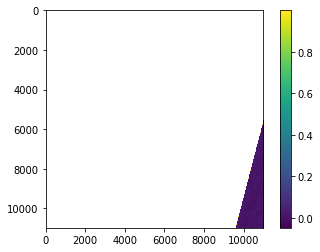

In [202]:
display_ndvi(band1)

In [180]:
products_df

,title,link,link_alternative,link_icon,summary,datatakesensingstart,beginposition,endposition,ingestiondate,orbitnumber,...,size,tileid,hv_order_tileid,filename,identifier,uuid,level1cpdiidentifier,granuleidentifier,datastripidentifier,geometry
11e92a7f-a96a-4bf7-a1ab-1c9436c01209,S2A_MSIL1C_20151222T180752_N0201_R041_T13VEE_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2015-12-22T18:07:52.029Z, Instrument: MS...",2015-12-22 18:07:52.029,2015-12-22 18:07:52.029,2015-12-22 18:07:52.029,2019-01-09 21:35:25.719,2612,...,28.45 MB,13VEE,VE13E,S2A_MSIL1C_20151222T180752_N0201_R041_T13VEE_2...,S2A_MSIL1C_20151222T180752_N0201_R041_T13VEE_2...,11e92a7f-a96a-4bf7-a1ab-1c9436c01209,S2A_OPER_MSI_L1C_TL_MTI__20151222T194620_A0026...,S2A_OPER_MSI_L1C_TL_MTI__20151222T194620_A0026...,S2A_OPER_MSI_L1C_DS_MTI__20151222T194620_S2015...,"(POLYGON ((-103.1609884 57.64107973, -103.1094..."


In [ ]:
# Get basic information about the product: its title, file size, MD5 sum, date, footprint and
# its download url
api.get_product_odata(<product_id>)

# Get the product's full metadata available on the server
api.get_product_odata(<product_id>, full=True)

In [208]:
geojson_geometry = {
  "type": "Polygon",
  "coordinates": [
    [ 
      [-104.7061,58.4088],
      [-104.7061,59.4988],
      [-104.7961,59.4988],
      [-104.7961,58.4088],
      [-104.7061,58.4088]
    ]
  ]
}

In [95]:

# # get images that overlap with our AOI 
# geometry_filter = {
#   "type": "GeometryFilter",
#   "field_name": "geometry",
#   "config": geojson_geometry
# }

# # get images acquired within a date range
# date_range_filter = {
#   "type": "DateRangeFilter",
#   "field_name": "acquired",
#   "config": {
#     "gte": "2016-08-31T00:00:00.000Z",
#     "lte": "2016-09-01T00:00:00.000Z"
#   }
# }

# # only get images which have <50% cloud coverage
# cloud_cover_filter = {
#   "type": "RangeFilter",
#   "field_name": "cloud_cover",
#   "config": {
#     "lte": 0.5
#   }
# }

# # combine our geo, date, cloud filters
# combined_filter = {
#   "type": "AndFilter",
#   "config": [geometry_filter, date_range_filter, cloud_cover_filter]
# }

In [100]:
# import os
# import json
# import requests
# from requests.auth import HTTPBasicAuth

# # API Key stored as an env variable
# PLANET_API_KEY = os.getenv('0ca23c1d50b4446cac5b0ce8def2aa3b') # replace PL_API_KEY with Planet API key in quotes

# item_type = "PSScene4Band"

# # API request object
# search_request = {
#   "interval": "day",
#   "item_types": [item_type], 
#   "filter": combined_filter
# }

# # fire off the POST request
# search_result = \
#   requests.post(
#     'https://api.planet.com/data/v1/quick-search',
#     auth=HTTPBasicAuth(PLANET_API_KEY, ''),
#     json=search_request)

# print(json.dumps(search_result.json(), indent=1))

In [99]:
# links = result.json()[u"analytic"]["_links"]
# self_link = links["_self"]
# activation_link = links["activate"]

# # Request activation of the 'analytic' asset:
# activate_result = \
#   requests.get(
#     activation_link,
#     auth=HTTPBasicAuth(PLANET_API_KEY, '')
#   )
  
# activation_status_result = \
#   requests.get(
#     self_link,
#     auth=HTTPBasicAuth(PLANET_API_KEY, '')
#   )
    
# print(activation_status_result.json()["status"])

In [93]:
# download_link = activation_status_result.json()["location"]
# print(download_link)

NameError: name 'activation_status_result' is not defined

In [102]:
geo_json_geometry = {
  "type": "Polygon",
  "coordinates": [
    [
      [
        -122.52227783203125,
        40.660847697284815
      ],
      [
        -122.52227783203125,
        40.987154933797335
      ],
      [
        -122.01690673828124,
        40.987154933797335
      ],
      [
        -122.01690673828124,
        40.660847697284815
      ],
      [
        -122.52227783203125,
        40.660847697284815
      ]
    ]
  ]
}